In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
temperatures = pd.read_csv("FLOODS/datasets/Temperature_1901_2016_Pakistan.csv")

In [33]:
yearlyTemps2017_2021 = [21.55, 21.87, 20.99, 20.81, 21.68]
temps2023 = [9.98, 17.16]
temps2022 = [11.2, 15.04, 22.92, 28.36, 30.93, 31.33, 29.93, 28.66, 28.62, 24.18, 18.86, 13.7]
temps2021 = [10.72, 16.67, 21.48, 25.32, 29.23, 31.68, 31.49, 30.34, 29.39, 23.96, 18.06, 12.97]
temperatures

,Temperature - (Celsius),Year,Month
0,7.72768,1901,January
1,8.93600,1901,February
2,16.96320,1901,March
3,21.27410,1901,April
4,26.04970,1901,May
...,...,...,...
1387,27.63320,2016,August
1388,26.71790,2016,September
1389,22.39820,2016,October
1390,15.76720,2016,November


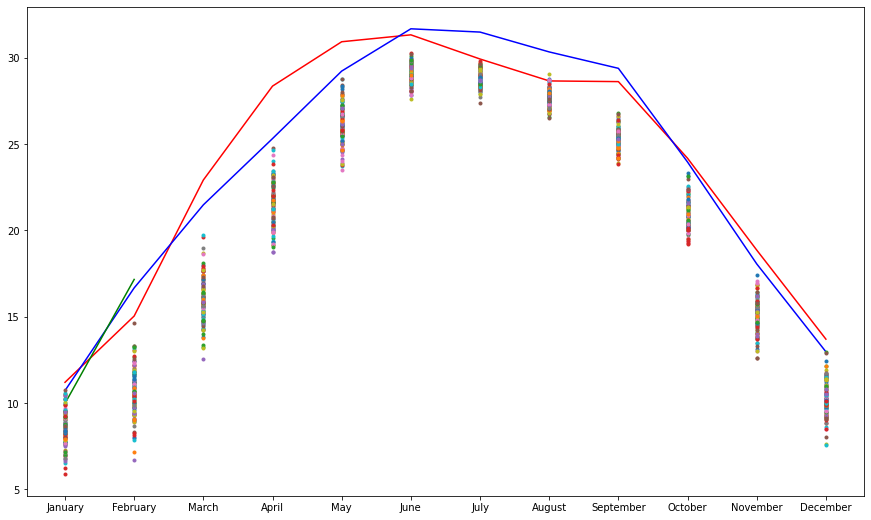

In [36]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(15,9))
plt.plot(months, temps2022, '-', c='red')
plt.plot(months, temps2021, '-', c='blue')
plt.plot(months[:2], temps2023, '-', c='green')
for year in range(1901, 2017):
    plt.plot(months, temperatures[temperatures[" Year"] == year]["Temperature - (Celsius)"], '.')
plt.show()

In [46]:
temperatures.groupby([' Year'], axis=0, as_index=False).mean().corr()

,Year,Temperature - (Celsius)
Year,1.000000,0.531155
Temperature - (Celsius),0.531155,1.000000


In [55]:
mean5 = temperatures[temperatures['Month'].isin(months[:5])].groupby([' Year'], as_index=False).mean()['Temperature - (Celsius)']

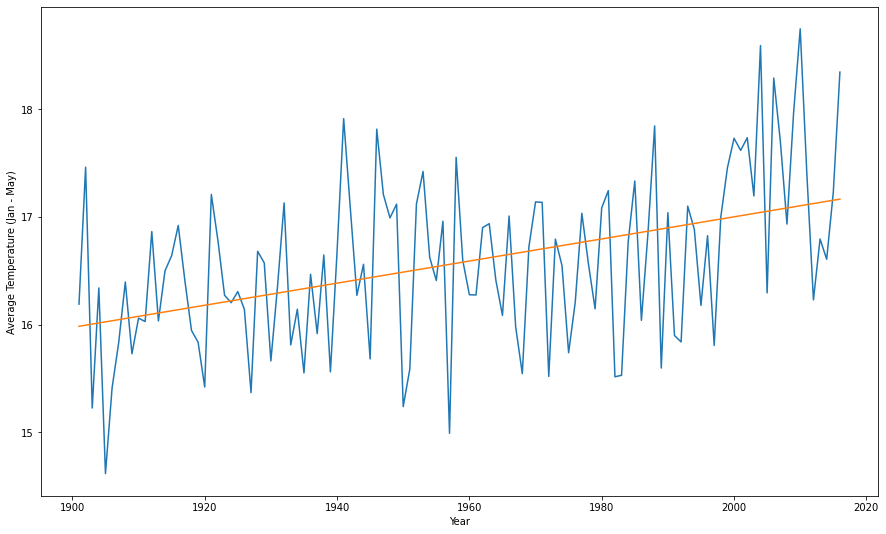

In [69]:
plt.figure(figsize=(15,9))
plt.plot(list(range(1901,2017)), mean5)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.array(list(range(1901,2017))).reshape(-1, 1), mean5)
plt.plot(list(range(1901,2017)), model.intercept_ + model.coef_ * np.array(list(range(1901,2017))))
plt.xlabel("Year")
plt.ylabel("Average Temperature (Jan - May)")
plt.show()